# Single Recording Code

Developing Code for Single Recordings
- Filtering
- Whole Trace Observations
- Epoch Extraction
- PSTHS

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from P2_Code.Single_Recording_Functions import *

In [2]:
experiment_path = r"C:\Users\yongc\Desktop\Photometry\Pilot_2\Synapse\Tanks\5_10_24_Social_Defeat_P2-240510-080738"
single_recording_path = r"C:\Users\yongc\Desktop\Photometry\Pilot_2\Synapse\Tanks\5_10_24_Social_Defeat_P2-240510-080738\n1-240510-085449"

## Bout Data from CSV

In [3]:
tdt_data = tdt.read_block(single_recording_path)
csv_path = r"P2_Code\5_10_24_Social_Defeat_Annotations\n1-240510-085449.csv"

extract_manual_annotation_behaviors(tdt_data, csv_path)


Found Synapse note file: C:\Users\yongc\Desktop\Photometry\Pilot_2\Synapse\Tanks\5_10_24_Social_Defeat_P2-240510-080738\n1-240510-085449\Notes.txt
read from t=0s to t=920.46s


In [4]:
tdt_data.epocs

Cam1	[struct]
Cam2	[struct]
Tick	[struct]
Investigation_event	[struct]
Defeat_event	[struct]
Approach_event	[struct]

In [5]:
tdt_data.epocs['Defeat_event']

name:	'Defeat_event'
onset:	[189.933, 192.067, 208.667, 222.467, 259.0, 432.2, 488.267, 496.067, 499.267, 615.0, 624.0, 643.467, 653.4]
offset:	[191.333, 204.933, 217.4, 236.333, 266.933, 438.133, 491.533, 496.933, 504.867, 620.133, 632.933, 648.8, 654.667]
type_str:	'epocs'
data:	[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## Plot Trace

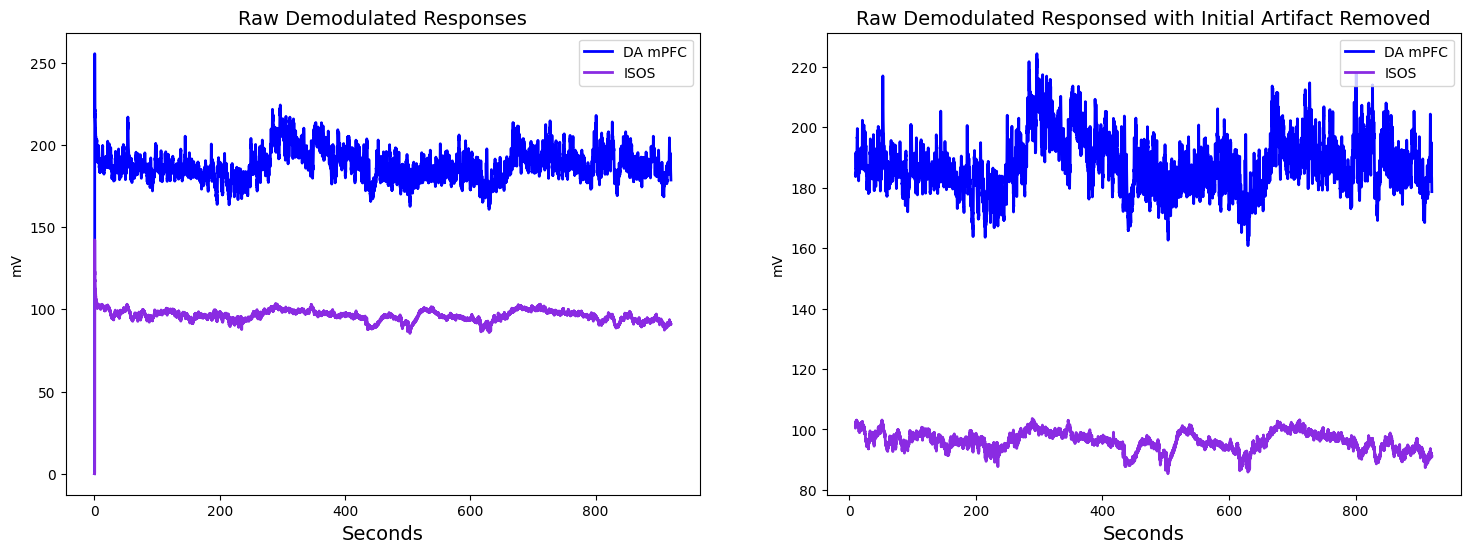

In [6]:
# Make some variables up here to so if they change in new recordings you won't have to change everything downstream
ISOS = '_405A' # 405nm channel.
DA = '_465A'
# Make a time array based on the number of samples and sample freq of the demodulated streams
time = np.linspace(1,len(tdt_data.streams[DA].data), len(tdt_data.streams[DA].data))/tdt_data.streams[DA].fs

# Plot both unprocessed demodulated stream            
fig1 = plt.figure(figsize=(18,6))
ax0 = fig1.add_subplot(121)

# Plotting the traces
p1, = ax0.plot(time, tdt_data.streams[DA].data, linewidth=2, color='blue', label='DA mPFC')
p2, = ax0.plot(time, tdt_data.streams[ISOS].data, linewidth=2, color='blueviolet', label='ISOS')

ax0.set_ylabel('mV')
ax0.set_xlabel('Seconds', fontsize=14)
ax0.set_title('Raw Demodulated Responses', fontsize=14)
ax0.legend(handles=[p1,p2], loc='upper right')


# There is often a large artifact on the onset of LEDs turning on
# Remove data below a set time t
t = 10
inds = np.where(time>t)
ind = inds[0][0]
time = time[ind:] # go from ind to final index
tdt_data.streams[DA].data = tdt_data.streams[DA].data[ind:]
tdt_data.streams[ISOS].data = tdt_data.streams[ISOS].data[ind:]

# Plot again at new time range
ax1 = fig1.add_subplot(122)

# Plotting the traces
p1, = ax1.plot(time,tdt_data.streams[DA].data, linewidth=2, color='blue', label='DA mPFC')
p2, = ax1.plot(time,tdt_data.streams[ISOS].data, linewidth=2, color='blueviolet', label='ISOS')

ax1.set_ylabel('mV')
ax1.set_xlabel('Seconds' , fontsize=14)
ax1.set_title('Raw Demodulated Responsed with Initial Artifact Removed', fontsize=14)
ax1.legend(handles=[p1,p2],loc='upper right')